In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('placementdata.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1,inplace=True)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
0,67.00,91.00,58.00,55.0,58.80,Placed,270000.0
1,79.33,78.33,77.48,86.5,66.28,Placed,200000.0
2,65.00,68.00,64.00,75.0,57.80,Placed,250000.0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,NaN
4,85.80,73.60,73.30,96.8,55.50,Placed,425000.0
...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,400000.0
211,58.00,60.00,72.00,74.0,53.62,Placed,275000.0
212,67.00,67.00,73.00,59.0,69.72,Placed,295000.0
213,74.00,66.00,58.00,70.0,60.23,Placed,204000.0


In [7]:
df.drop(['salary'], axis=1, inplace=True)

In [8]:
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,67.00,91.00,58.00,55.0,58.80,Placed
1,79.33,78.33,77.48,86.5,66.28,Placed
2,65.00,68.00,64.00,75.0,57.80,Placed
3,56.00,52.00,52.00,66.0,59.43,Not Placed
4,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed
211,58.00,60.00,72.00,74.0,53.62,Placed
212,67.00,67.00,73.00,59.0,69.72,Placed
213,74.00,66.00,58.00,70.0,60.23,Placed


In [9]:
x=df.drop('status',axis=1)
y=df['status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [11]:
y_pred=model.predict(x_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1.head(15)

,Actual Status,Predicted Status
108,Placed,Placed
207,Placed,Placed
106,Not Placed,Not Placed
107,Placed,Placed
51,Not Placed,Not Placed
33,Placed,Placed
59,Placed,Not Placed
152,Placed,Placed
4,Placed,Placed
31,Not Placed,Not Placed


In [12]:
print(accuracy_score(y_test,y_pred)*100)

80.0


In [13]:
x_train.shape

(150, 5)

In [14]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

data = y_pred
a=y_pred
values = array(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
y_pred=integer_encoded


[1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0]


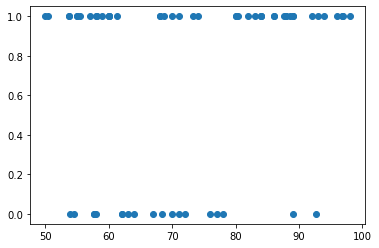

In [15]:
plt.scatter(x_test['etest_p'], y_pred)

In [16]:
sample=model.predict([[91,89,85,83,83.5]])
print(sample)

['Placed']
